In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [32]:
data = pd.read_csv('./commodity_trade_statistics_data.csv')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
serbia = data[data['country_or_area'] == 'Serbia'].copy()

In [34]:
data = None

In [35]:
serbia.head(10)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
43976,Serbia,2016,10111,"Horses, live pure-bred breeding",Export,4583,1000.0,No Quantity,NaN,01_live_animals
43977,Serbia,2016,10111,"Horses, live pure-bred breeding",Import,10719,800.0,No Quantity,NaN,01_live_animals
43978,Serbia,2016,10119,"Horses, live except pure-bred breeding",Export,70379,14990.0,No Quantity,NaN,01_live_animals
43979,Serbia,2016,10119,"Horses, live except pure-bred breeding",Import,31415,5500.0,Number of items,2.0,01_live_animals
43980,Serbia,2016,10120,"Asses, mules and hinnies, live",Export,1535,950.0,No Quantity,NaN,01_live_animals
43981,Serbia,2016,10210,"Bovine animals, live pure-bred breeding",Export,387921,178889.0,Number of items,235.0,01_live_animals
43982,Serbia,2016,10210,"Bovine animals, live pure-bred breeding",Import,390178,92374.0,Number of items,189.0,01_live_animals
43983,Serbia,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,27487641,12609009.0,Number of items,34507.0,01_live_animals
43984,Serbia,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,484349,188362.0,Number of items,529.0,01_live_animals
43985,Serbia,2016,10310,"Swine, live pure-bred breeding",Import,166009,17105.0,No Quantity,NaN,01_live_animals


# Basic stats

In [36]:
serbia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12303 entries, 43976 to 8224025
Data columns (total 10 columns):
country_or_area    12303 non-null object
year               12303 non-null int64
comm_code          12303 non-null object
commodity          12303 non-null object
flow               12303 non-null object
trade_usd          12303 non-null int64
weight_kg          12220 non-null float64
quantity_name      12303 non-null object
quantity           11151 non-null float64
category           12303 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


In [37]:
serbia.year.sort_values().unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

In [104]:
serbia.isnull().sum()

country_or_area       0
year                  0
comm_code             0
commodity             0
flow                  0
trade_usd             0
weight_kg            83
quantity_name         0
quantity           1152
category              0
commodity1            0
dtype: int64

# Export & Import over the years

In [38]:
serbia.groupby(['year', 'flow']).sum().head(5)

trade_usd     weight_kg      quantity
year flow                                           
2005 Export   5153489333  1.733414e+09  1.711237e+09
     Import  11565823817  2.819480e+09  2.804360e+09
2006 Export   7297676728  2.177738e+09  2.146046e+09
     Import  14475002899  3.637183e+09  3.628314e+09
2007 Export   9922155321  1.713395e+09  1.665150e+09

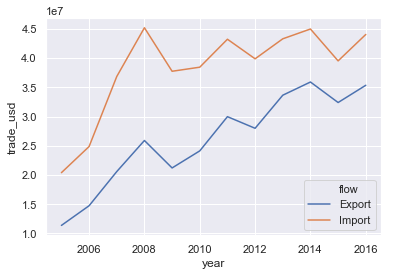

In [39]:
sns.lineplot(x='year', y='trade_usd', hue='flow', ci=None, data=serbia)

## What are the most traded commodities in serbia?

In [40]:
serbia['commodity1'] = serbia['commodity'].str.split(', ', expand=True)[0]

In [42]:
serbia.head(5)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,commodity1
43976,Serbia,2016,10111,"Horses, live pure-bred breeding",Export,4583,1000.0,No Quantity,NaN,01_live_animals,Horses
43977,Serbia,2016,10111,"Horses, live pure-bred breeding",Import,10719,800.0,No Quantity,NaN,01_live_animals,Horses
43978,Serbia,2016,10119,"Horses, live except pure-bred breeding",Export,70379,14990.0,No Quantity,NaN,01_live_animals,Horses
43979,Serbia,2016,10119,"Horses, live except pure-bred breeding",Import,31415,5500.0,Number of items,2.0,01_live_animals,Horses
43980,Serbia,2016,10120,"Asses, mules and hinnies, live",Export,1535,950.0,No Quantity,NaN,01_live_animals,Asses


In [87]:
serbia_import = serbia[(serbia['flow'] == 'Import') & (serbia['commodity1'] != 'ALL COMMODITIES') & (serbia['category'] != '99_commodities_not_specified_according_to_kind')]
serbia_export = serbia[(serbia['flow'] == 'Export') & (serbia['commodity1'] != 'ALL COMMODITIES') & (serbia['category'] != '99_commodities_not_specified_according_to_kind')]

In [88]:
# Draws a summarized chart data
def draw_summarized_chart(data, title):
    sns.barplot(y=data.index, x=data.values, orient='h')
    plt.ylabel("");
    plt.title(title)

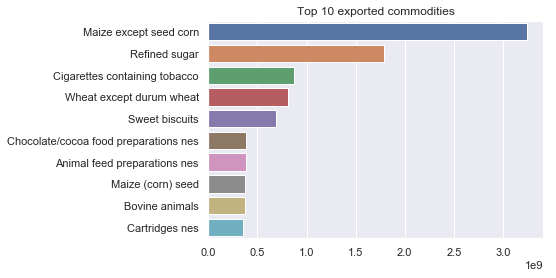

In [89]:
serbia_top10_export = serbia_export.groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_export, "Top 10 exported commodities")

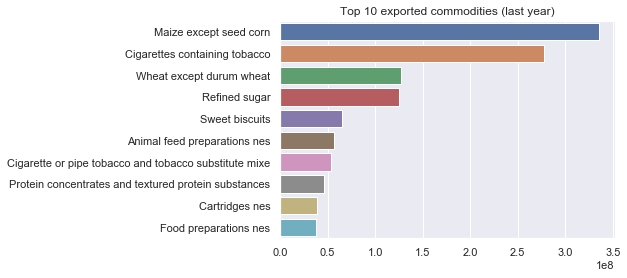

In [90]:
# Get top 10 exported commodities in last year

serbia_top10_export_last_year = serbia_export[serbia_export['year'] == 2016].groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_export_last_year, "Top 10 exported commodities (last year)")

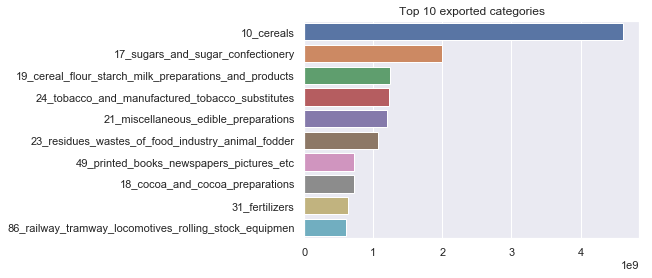

In [91]:
# Top 10 commodities by category
serbia_top10_categories_exported_last_year = serbia_export.groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_categories_exported_last_year, "Top 10 exported categories")

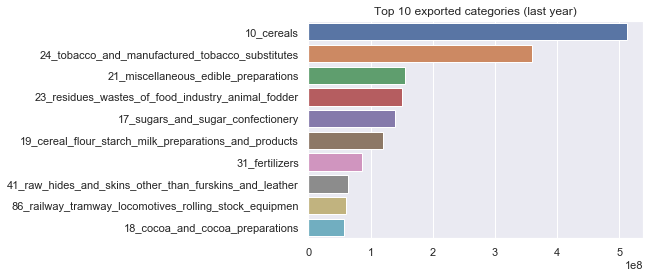

In [92]:
# Top 10 commodities by category (in 2016)
serbia_top10_categories_exported_last_year = serbia_export[serbia_export['year'] == 2016].groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_categories_exported_last_year, "Top 10 exported categories (last year)")

In [96]:
## What are we importing the most?

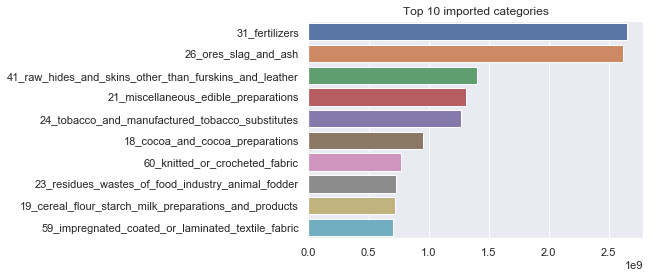

In [97]:
serbia_top10_categories_import_last_year = serbia_import.groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_categories_import_last_year, "Top 10 imported categories")

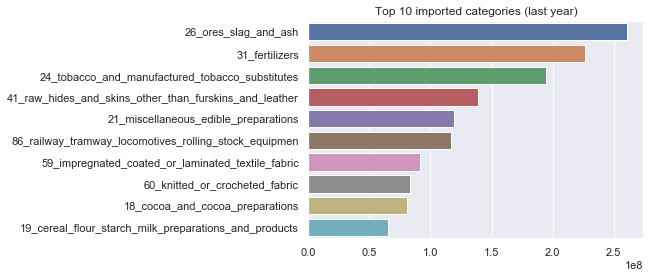

In [98]:
serbia_top10_categories_import_last_year = serbia_import[serbia_import['year'] == 2016].groupby('category').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_categories_import_last_year, "Top 10 imported categories (last year)")

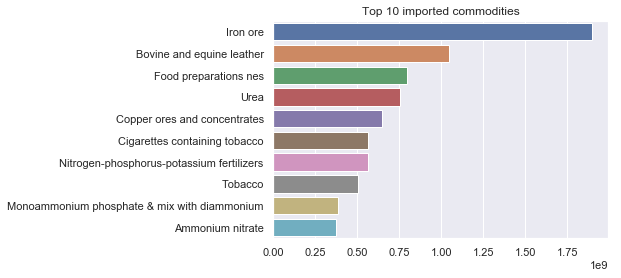

In [99]:
serbia_top10_commodities = serbia_import.groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_commodities, "Top 10 imported commodities")

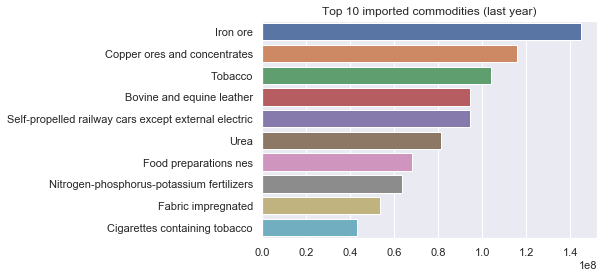

In [101]:
serbia_top10_commodities_import_last_year = serbia_import[serbia_import['year'] == 2016].groupby('commodity1').sum()['trade_usd'].sort_values(ascending=False).head(10)

draw_summarized_chart(serbia_top10_commodities_import_last_year, "Top 10 imported commodities (last year)")

In [114]:
## Let's try a scatter plot. We'll take top 10 commodities and scatterplot them over the year and amount

top10_exported_commodities = serbia_export.groupby(['commodity1'])['trade_usd'].sum().sort_values(ascending=False).head(10).index

In [118]:
top10_exported_commodities

Index(['Maize except seed corn', 'Refined sugar',
       'Cigarettes containing tobacco', 'Wheat except durum wheat',
       'Sweet biscuits', 'Chocolate/cocoa food preparations nes',
       'Animal feed preparations nes', 'Maize (corn) seed', 'Bovine animals',
       'Cartridges nes'],
      dtype='object', name='commodity1')

In [117]:
serbia_export[serbia_export.commodity1.isin(top10_exported_commodities)].head(10)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,commodity1
43981,Serbia,2016,10210,"Bovine animals, live pure-bred breeding",Export,387921,178889.0,Number of items,235.0,01_live_animals,Bovine animals
43983,Serbia,2016,10290,"Bovine animals, live, except pure-bred breeding",Export,27487641,12609009.0,Number of items,34507.0,01_live_animals,Bovine animals
44007,Serbia,2015,10210,"Bovine animals, live pure-bred breeding",Export,456556,256806.0,Number of items,212.0,01_live_animals,Bovine animals
44009,Serbia,2015,10290,"Bovine animals, live, except pure-bred breeding",Export,46443065,21388042.0,Number of items,46353.0,01_live_animals,Bovine animals
44035,Serbia,2014,10210,"Bovine animals, live pure-bred breeding",Export,5174,1648.0,Number of items,2.0,01_live_animals,Bovine animals
44037,Serbia,2014,10290,"Bovine animals, live, except pure-bred breeding",Export,29562810,9852351.0,Number of items,26676.0,01_live_animals,Bovine animals
44060,Serbia,2013,10210,"Bovine animals, live pure-bred breeding",Export,204436,61868.0,Number of items,93.0,01_live_animals,Bovine animals
44062,Serbia,2013,10290,"Bovine animals, live, except pure-bred breeding",Export,38021812,13203978.0,Number of items,49471.0,01_live_animals,Bovine animals
44087,Serbia,2012,10210,"Bovine animals, live pure-bred breeding",Export,11983,3782.0,Number of items,5.0,01_live_animals,Bovine animals
44089,Serbia,2012,10290,"Bovine animals, live, except pure-bred breeding",Export,50168807,18610213.0,Number of items,65407.0,01_live_animals,Bovine animals
